In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from math import *

In [76]:
dd = pd.read_csv('uo_nn_batch_590152-171251704.csv', sep=";")
dd.columns = dd.columns.str.replace(' ', '')

# convert Lk from string to np.array, separated by comma
dd['Lk'] = dd['Lk'].apply(lambda x: np.array(x.split(','), dtype=float))

dd.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,||g*||,Lk
0,1,0.00,1,84,0.5468,100.0,99.6,5.810000e-07,9.470000e-07,"[0.25, 0.1437, 0.055989, 0.010159, 0.0068473, ..."
1,1,0.00,3,50,0.2418,100.0,99.6,1.380000e-35,1.030000e-34,"[0.25, 0.1437, 0.055619, 0.0077025, 0.0038855,..."
2,1,0.00,7,1625,0.0732,100.0,100.0,1.200000e-03,3.440000e-03,"[0.0012405, 0.0024928, 0.0011406, 0.0014767, 0..."
3,1,0.01,1,55,0.1742,99.6,100.0,2.760000e-02,5.720000e-07,"[0.25, 0.14435, 0.059258, 0.035652, 0.030432, ..."
4,1,0.01,3,47,0.1818,99.6,100.0,2.760000e-02,6.360000e-07,"[0.25, 0.14435, 0.058861, 0.033117, 0.028247, ..."


In [49]:
def show_heatmap(df, isd, val, figsize=(10,5), log:bool = False, vmin:float = None, vmax:float = None, fmt=".0e"):
        t = df[dd['isd'] == isd].pivot_table(index='la', columns='num_target', values=val)
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax) if log else None
        plt.figure(figsize=figsize)
        sns.heatmap(t, annot=True, fmt=fmt, linewidths=.5, norm=norm, cmap='viridis')

def plot_val(df, isd, val, log:bool = False):
    t = df[dd['isd'] == isd]
    if log:
        t[val] = np.log(t[val])
    for i in range(1, 11):
        plt.plot(t[t['num_target'] == i]['la'], t[t['num_target'] == i][val], label=i)

# Global convergence

checking the gradient at the last iteration

||g*|| for isd = 1


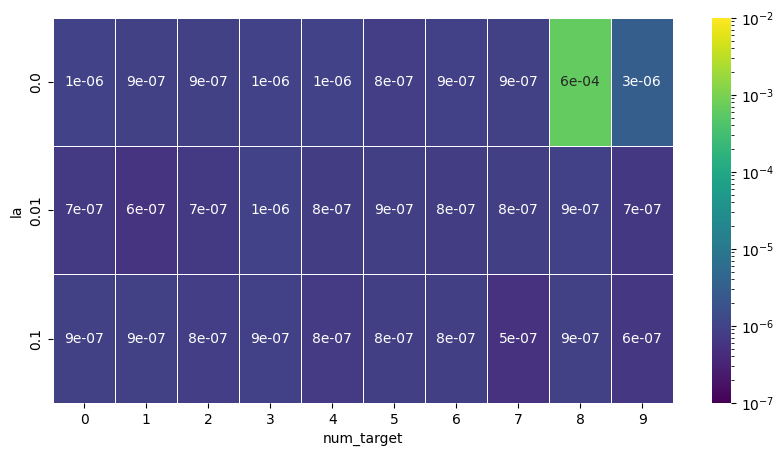

||g*|| for isd = 3


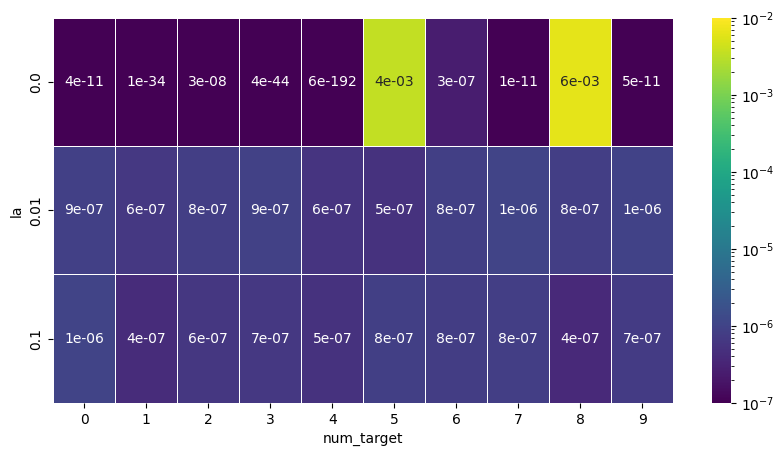

||g*|| for isd = 7


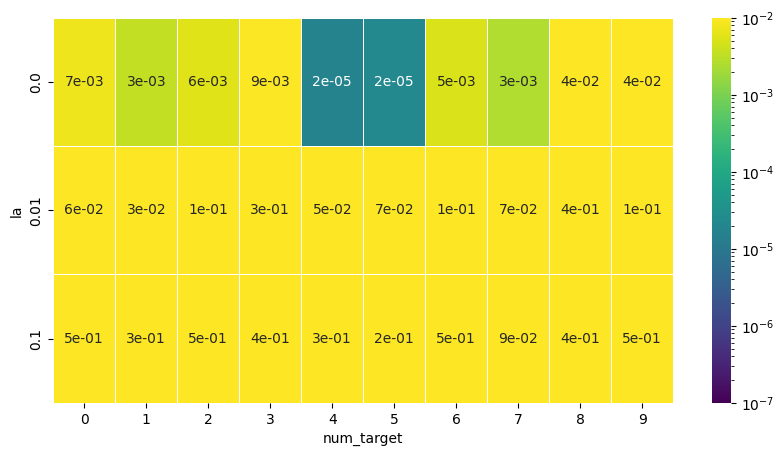

In [57]:
par = '||g*||'
for isd in [1, 3, 7]:
    show_heatmap(dd, isd, par, log=True, vmin=1e-7, vmax=1e-2)
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/go_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()

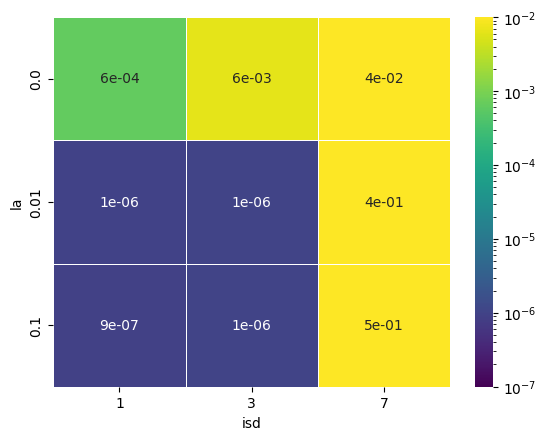

In [83]:
# generate a dataset that for each isd and each la, we have the worst ||g*||
# we only keep the columns isd, la, ||g*||
def worst_go(df):
    df = df[['isd', 'la', '||g*||']]
    df = df.sort_values(by=['||g*||'], ascending=False)
    df = df.drop_duplicates(subset=['isd', 'la'])
    return df

# show a heatmap of the worst ||g*|| for each isd and each la
sns.heatmap(worst_go(dd).pivot_table(index='la', columns='isd', values='||g*||'), annot=True, fmt=".0e", linewidths=.5, norm=matplotlib.colors.LogNorm(vmin=1e-7, vmax=1e-2), cmap='viridis')
plt.savefig('figures/worst_go.png', dpi=300, bbox_inches='tight')
plt.show()

niter for isd = 1


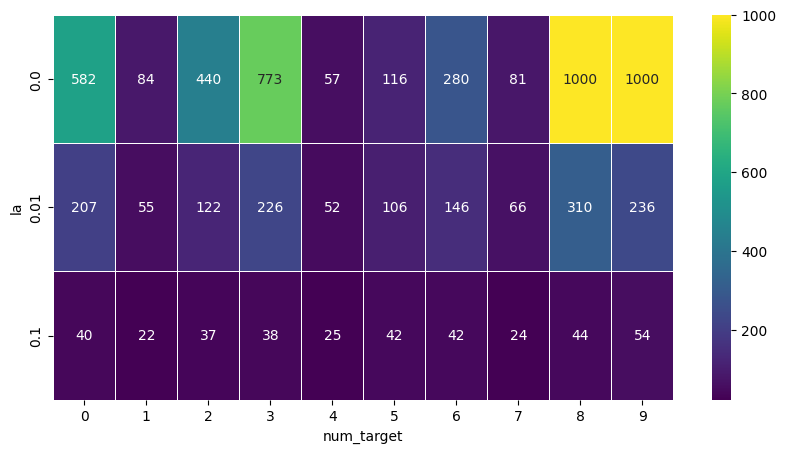

niter for isd = 3


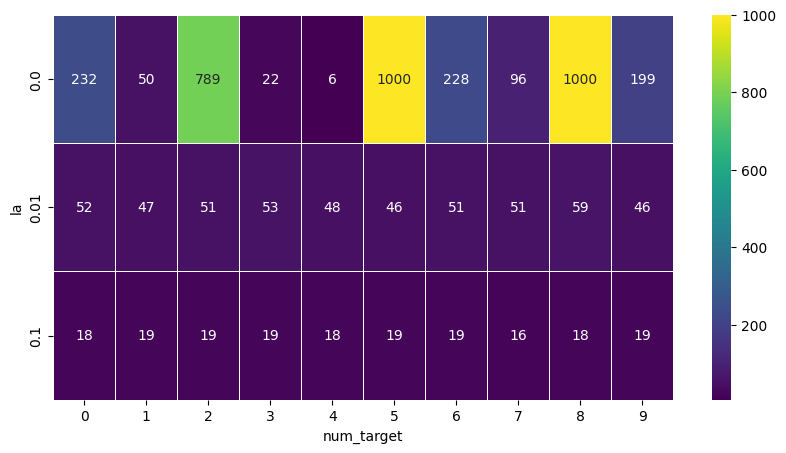

niter for isd = 7


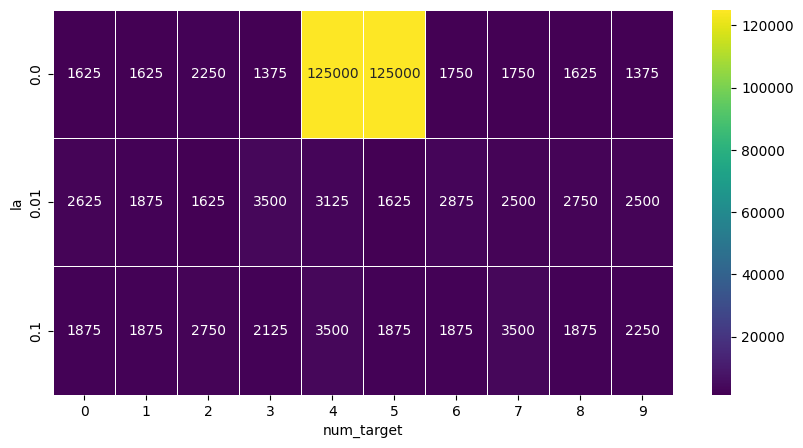

In [58]:
par = 'niter'
for isd in [1, 3, 7]:
    show_heatmap(dd, isd, par, fmt=".0f")
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/niter_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()

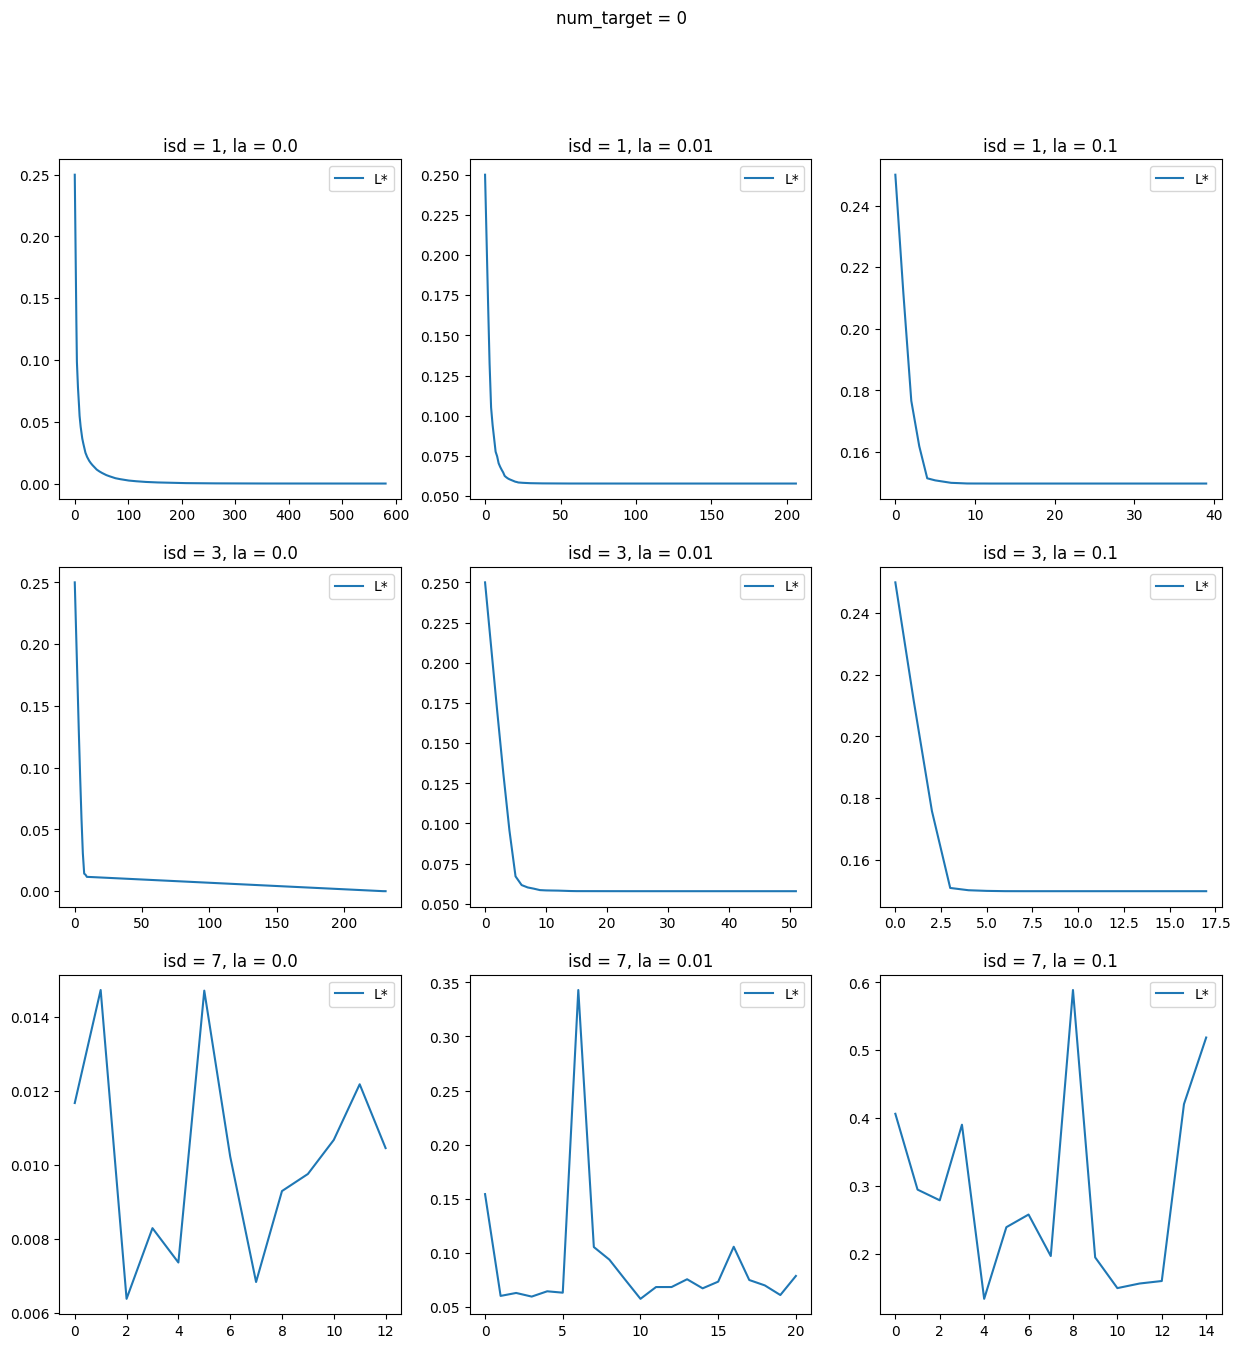

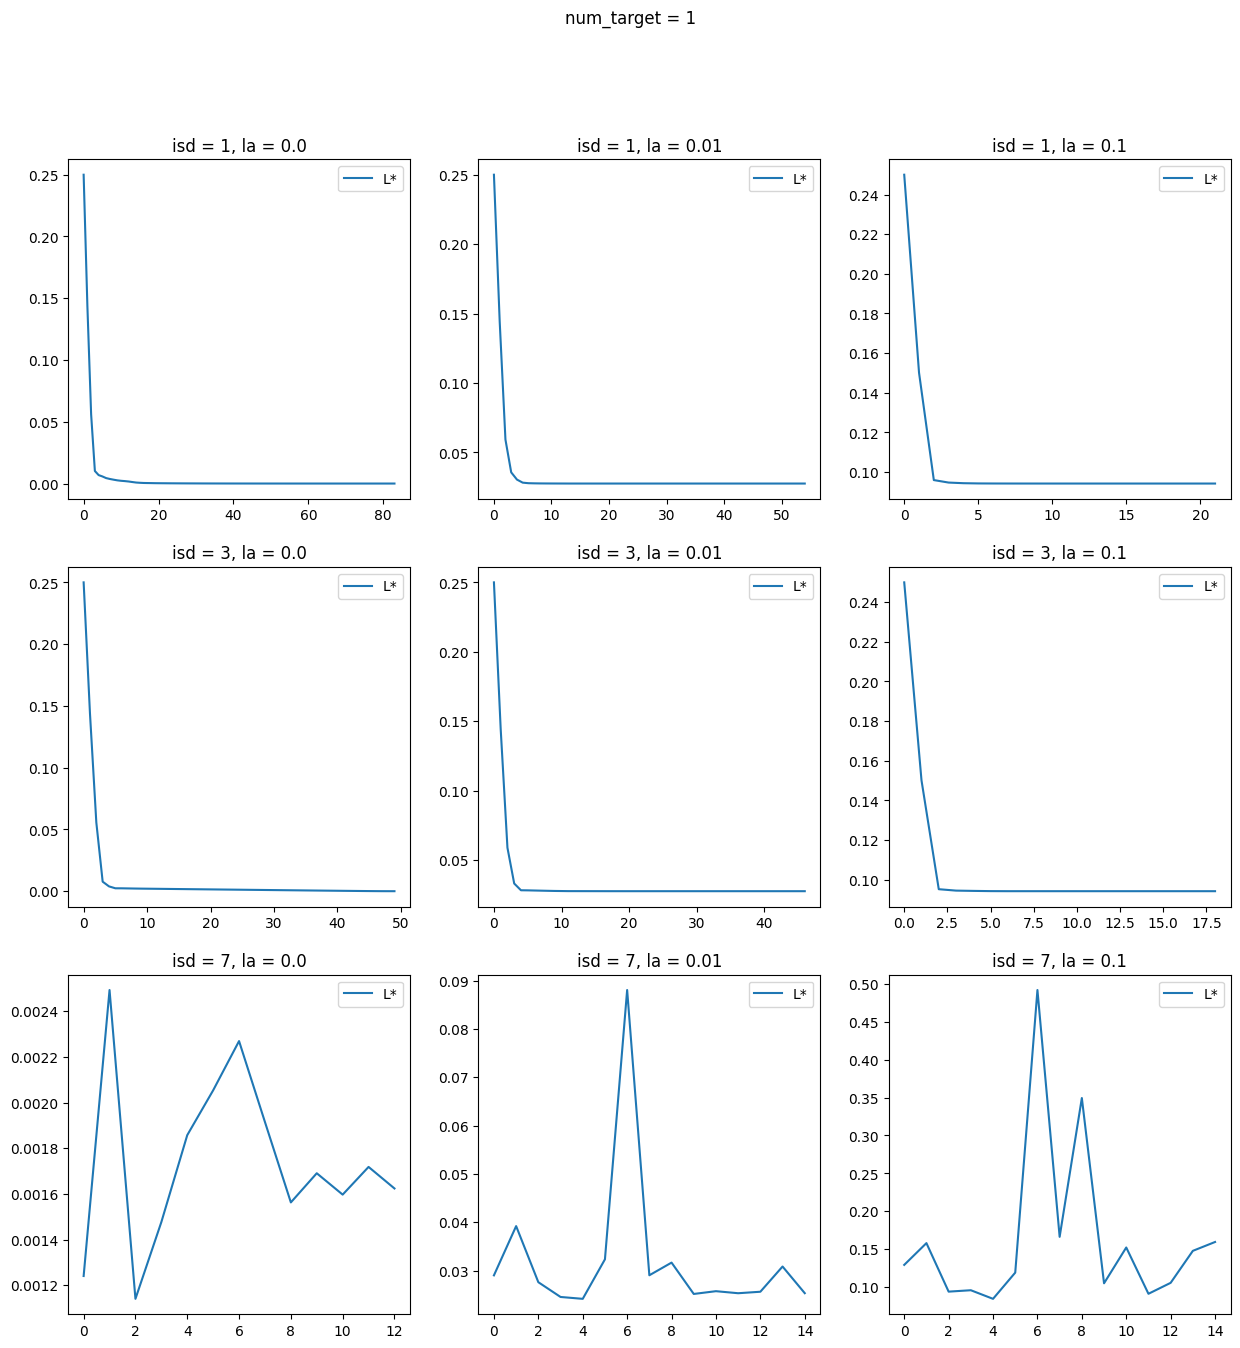

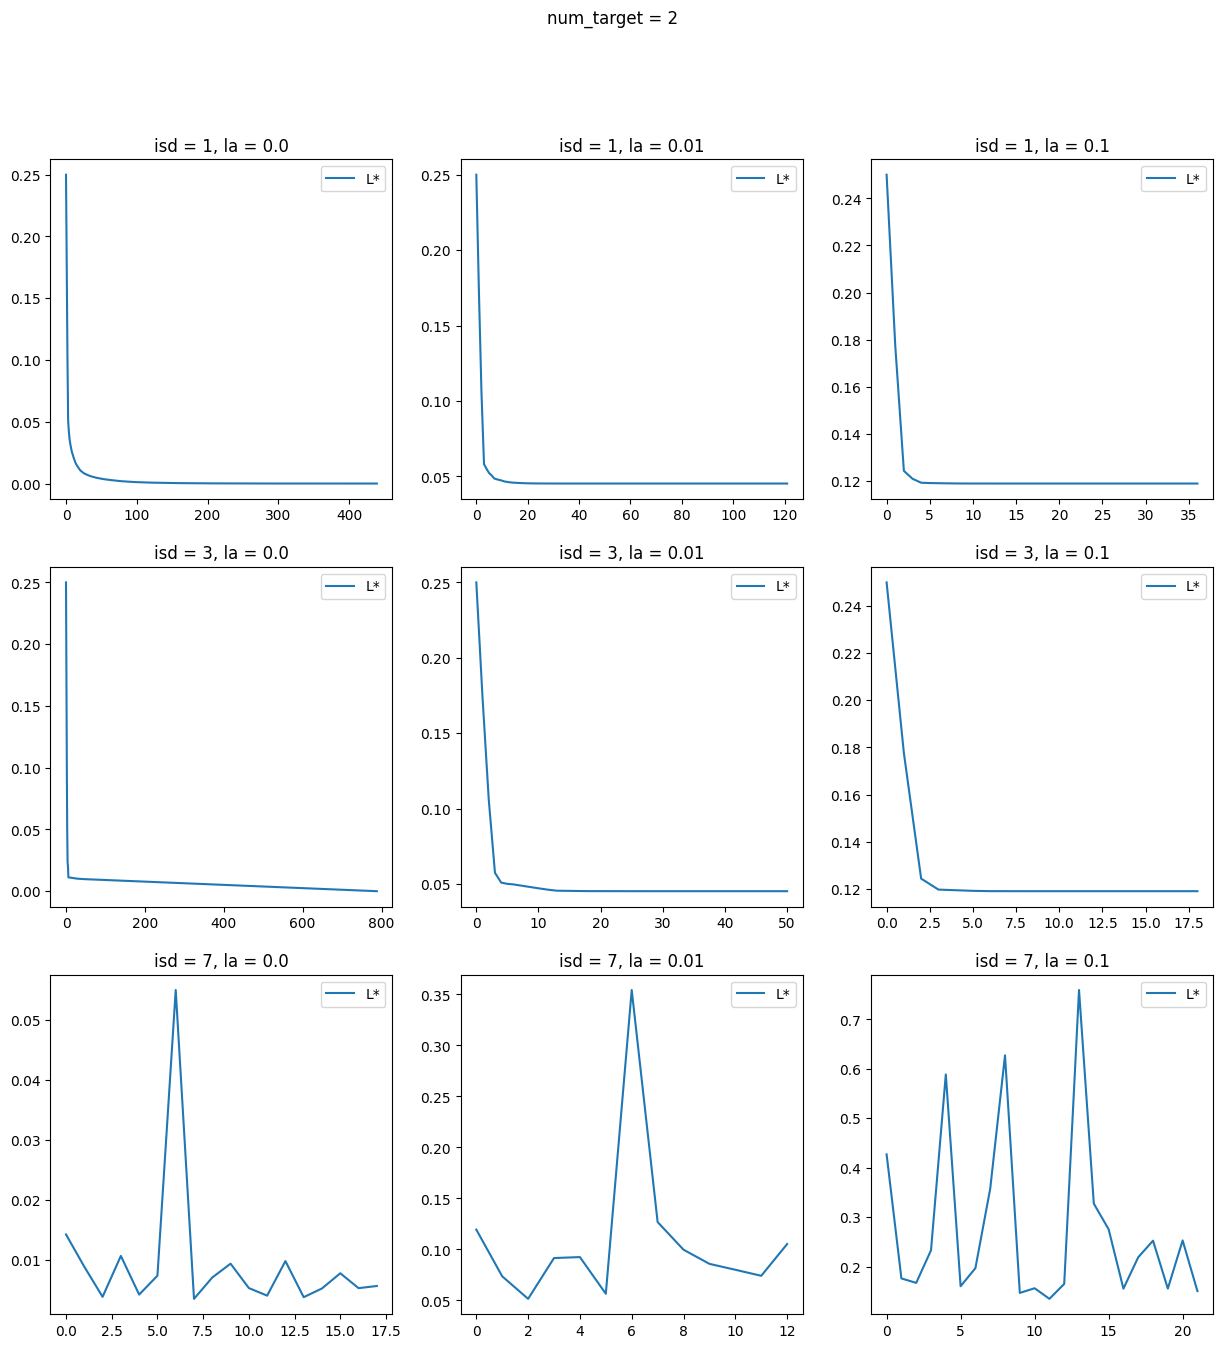

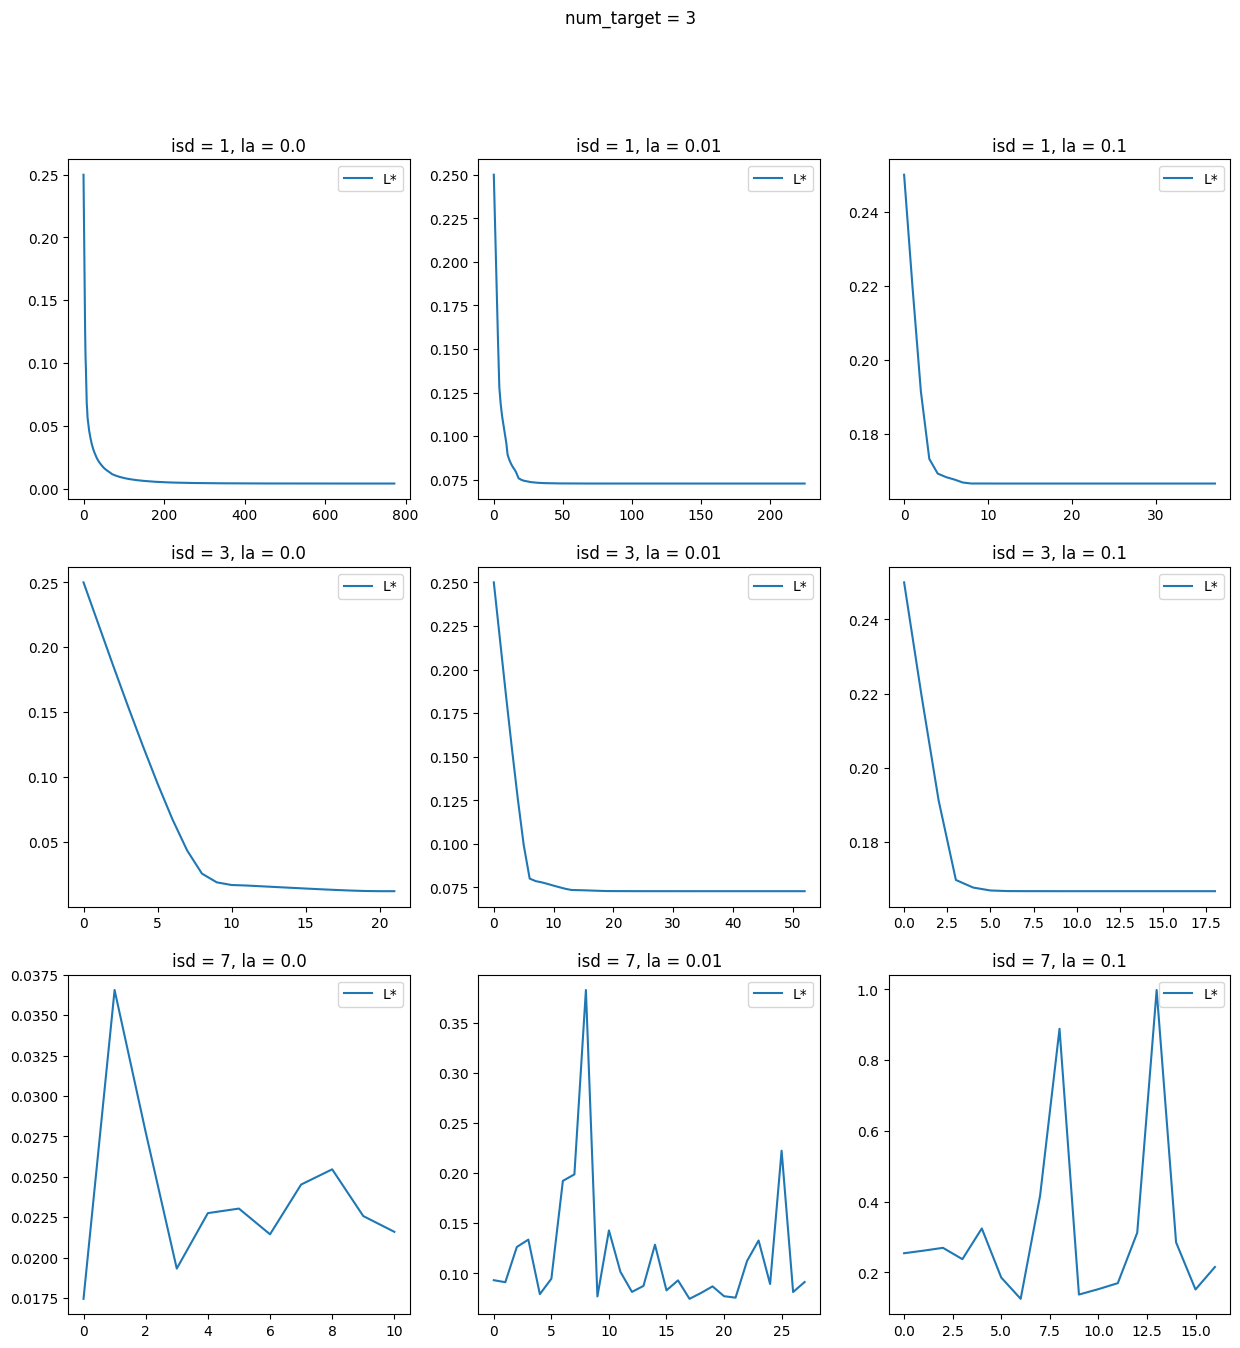

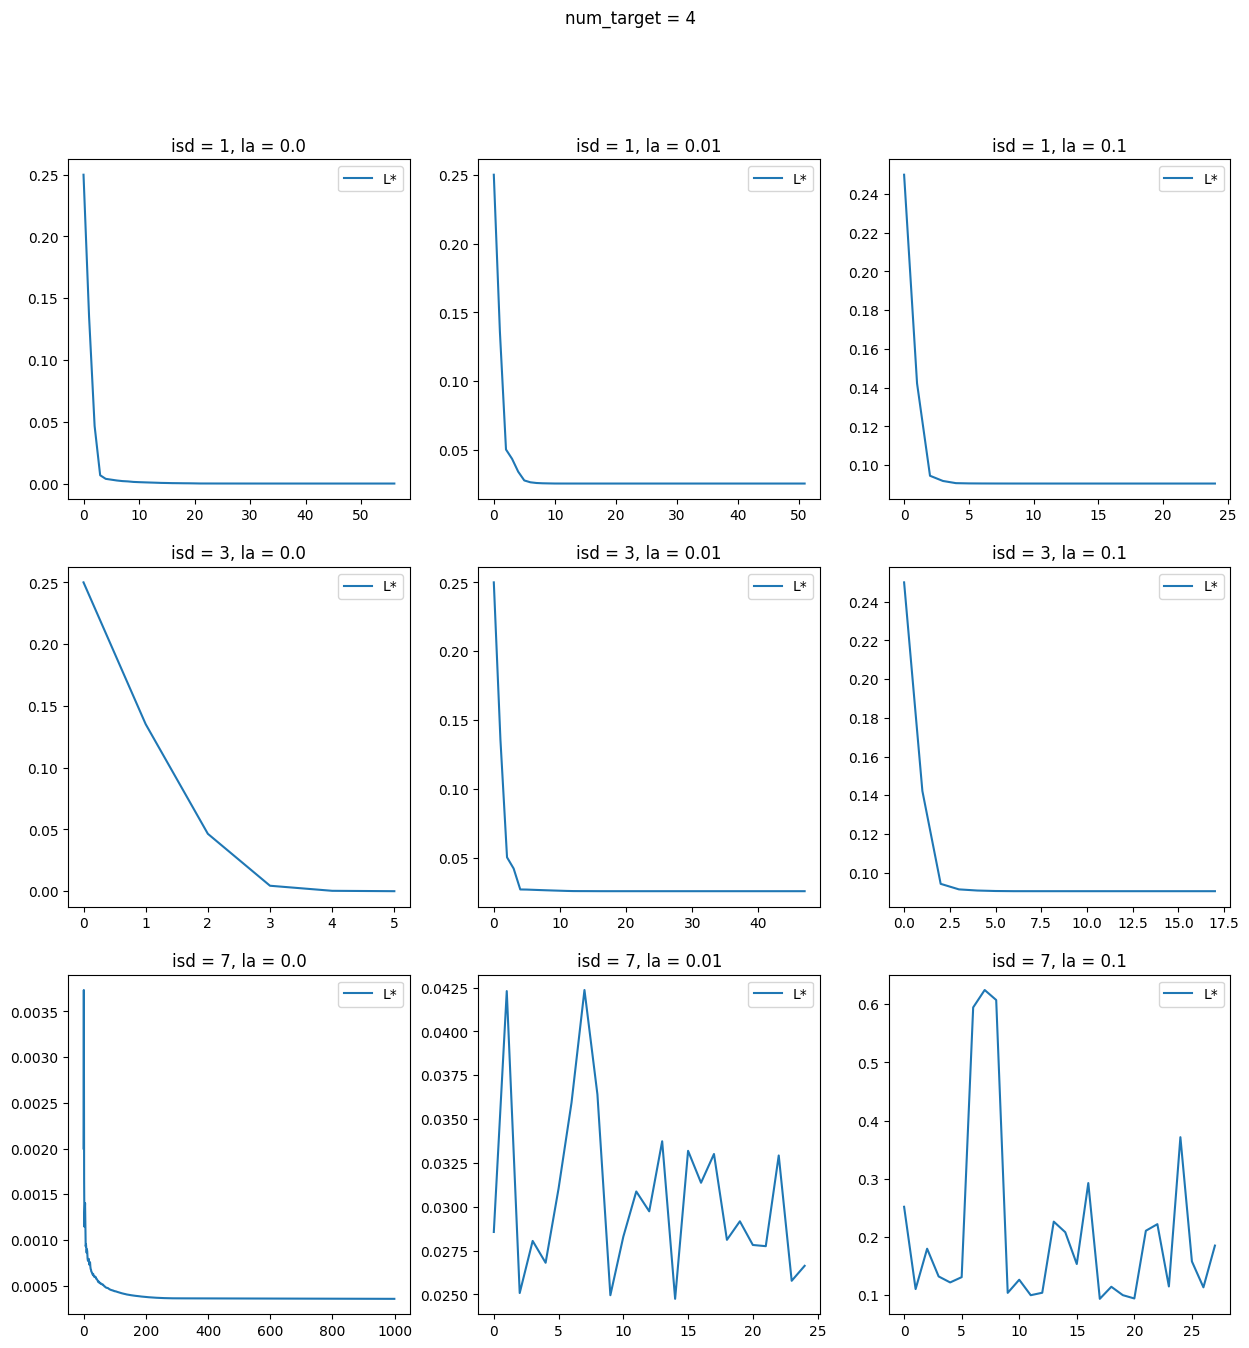

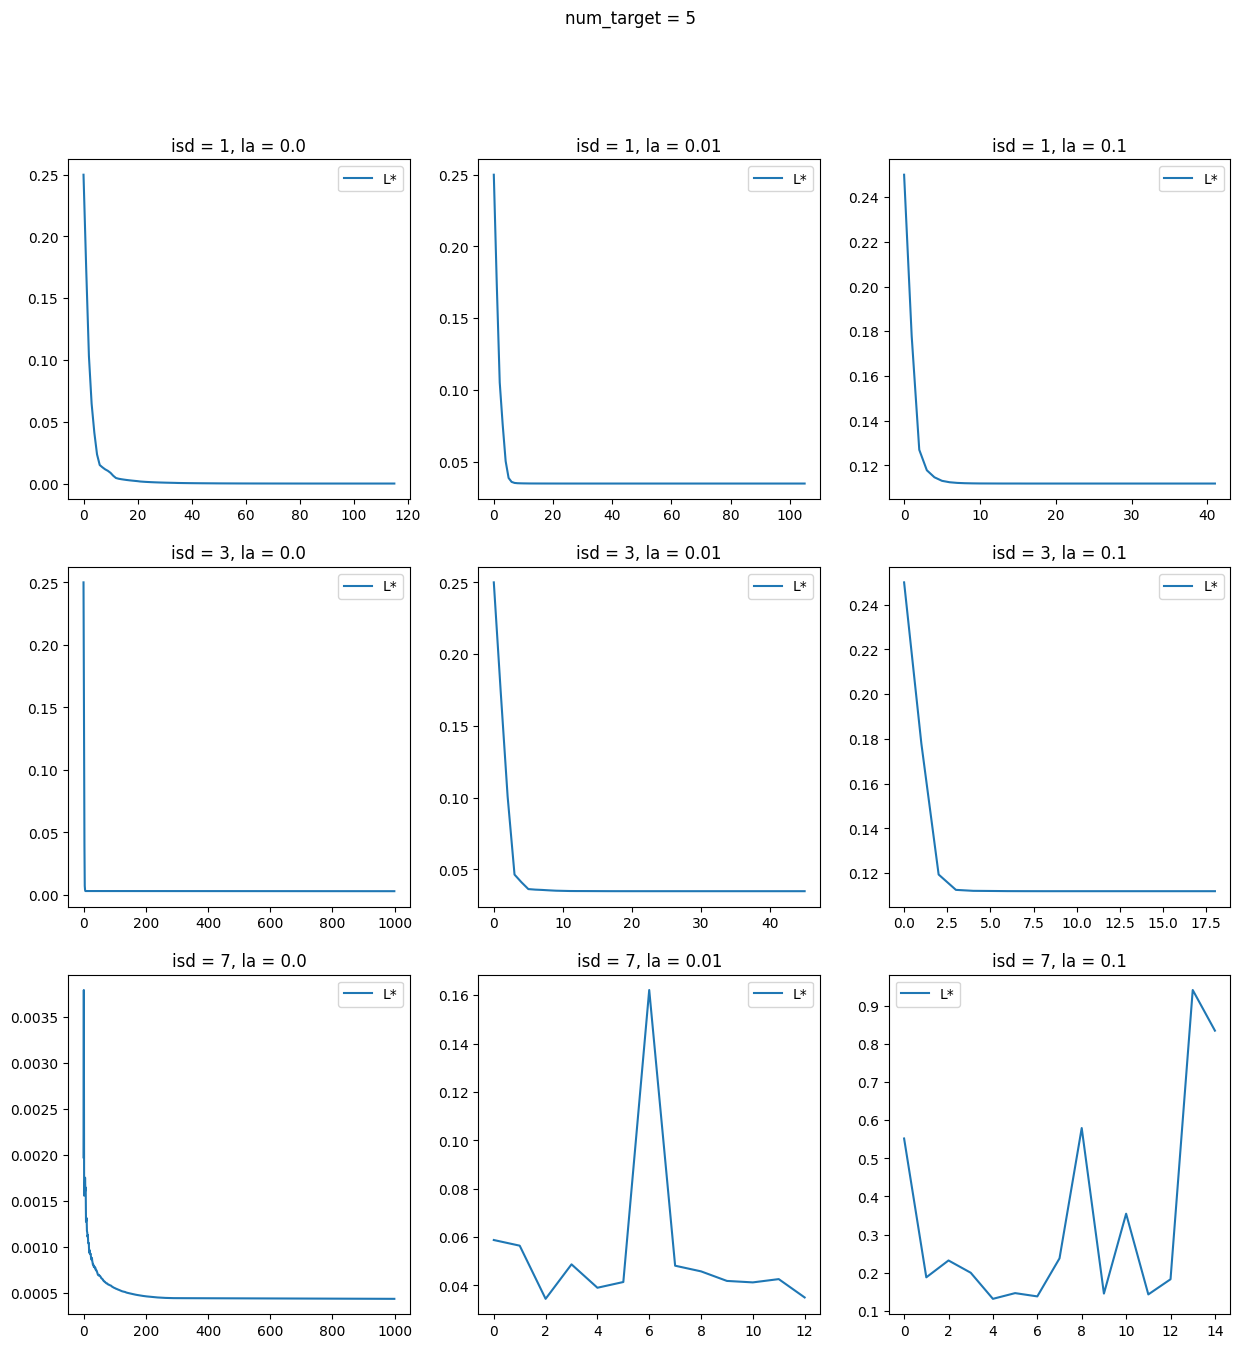

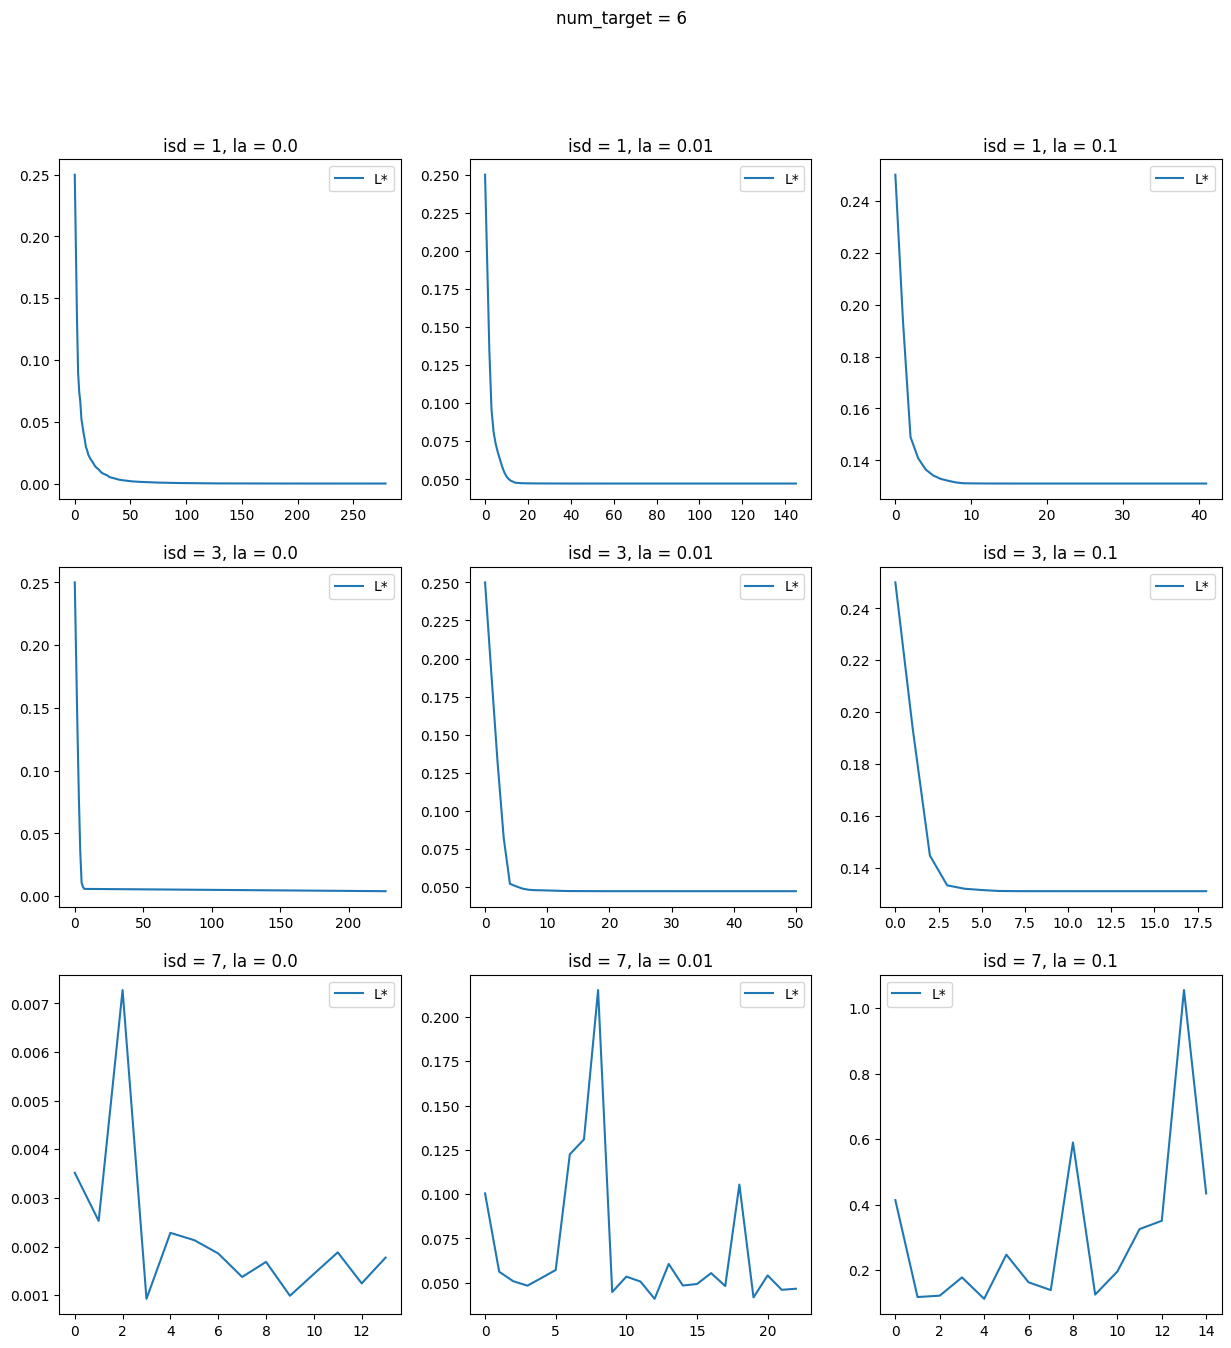

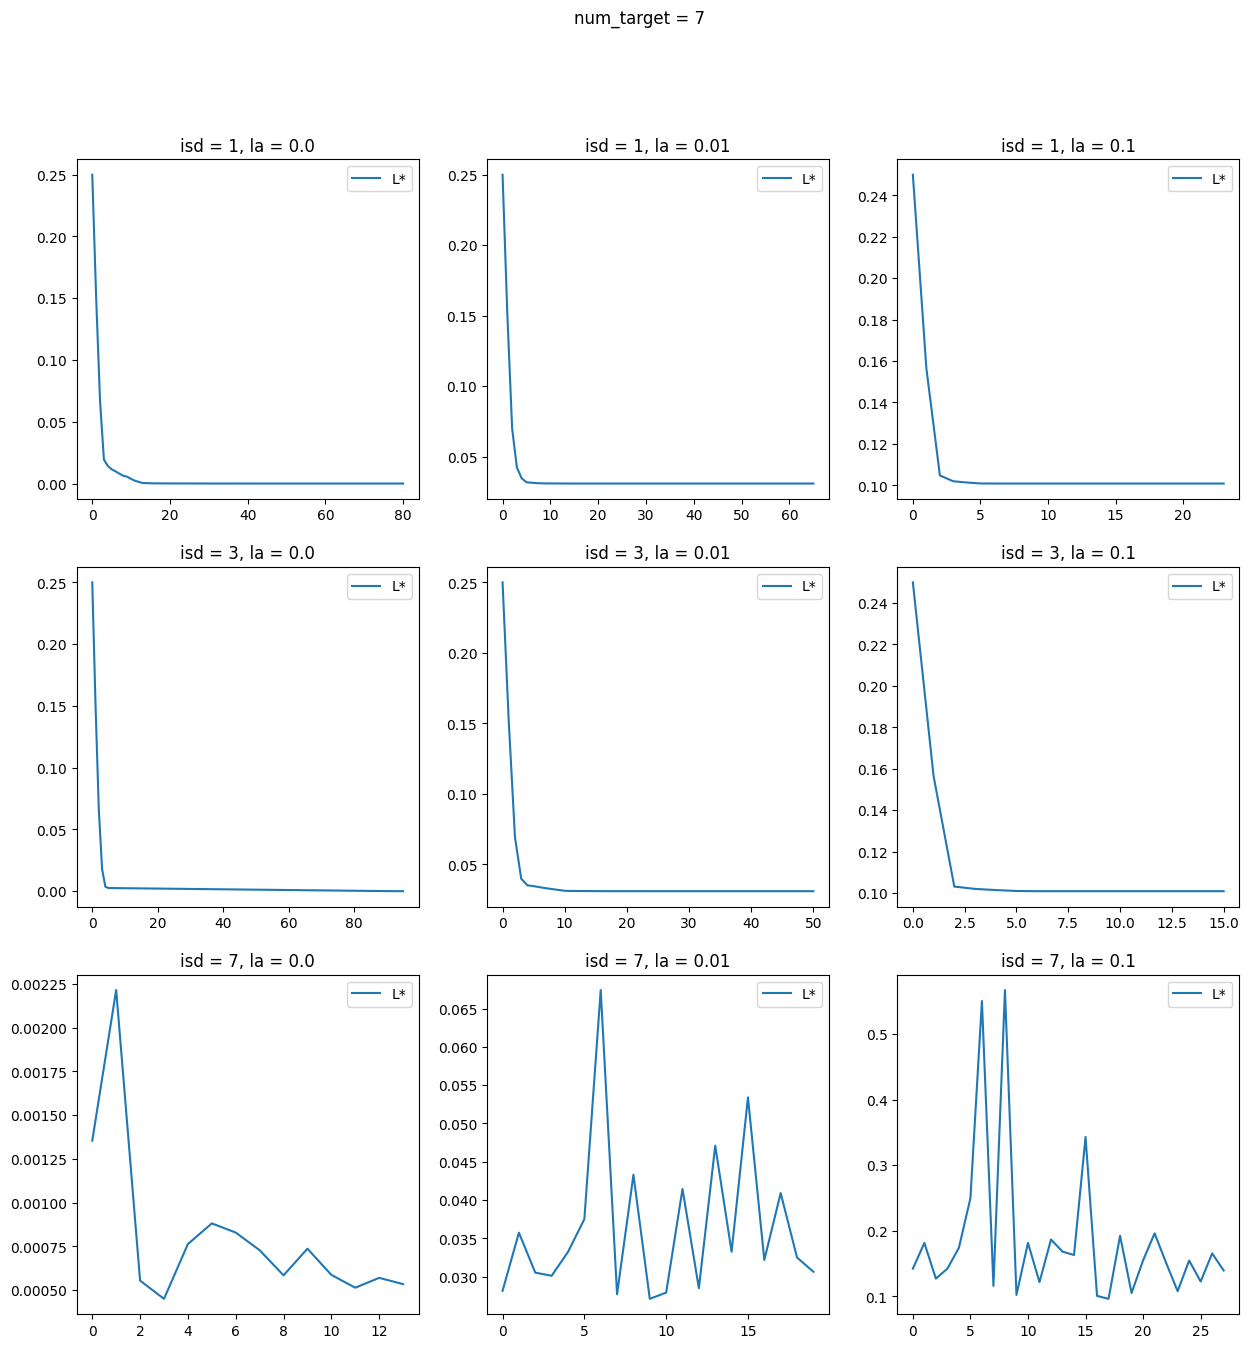

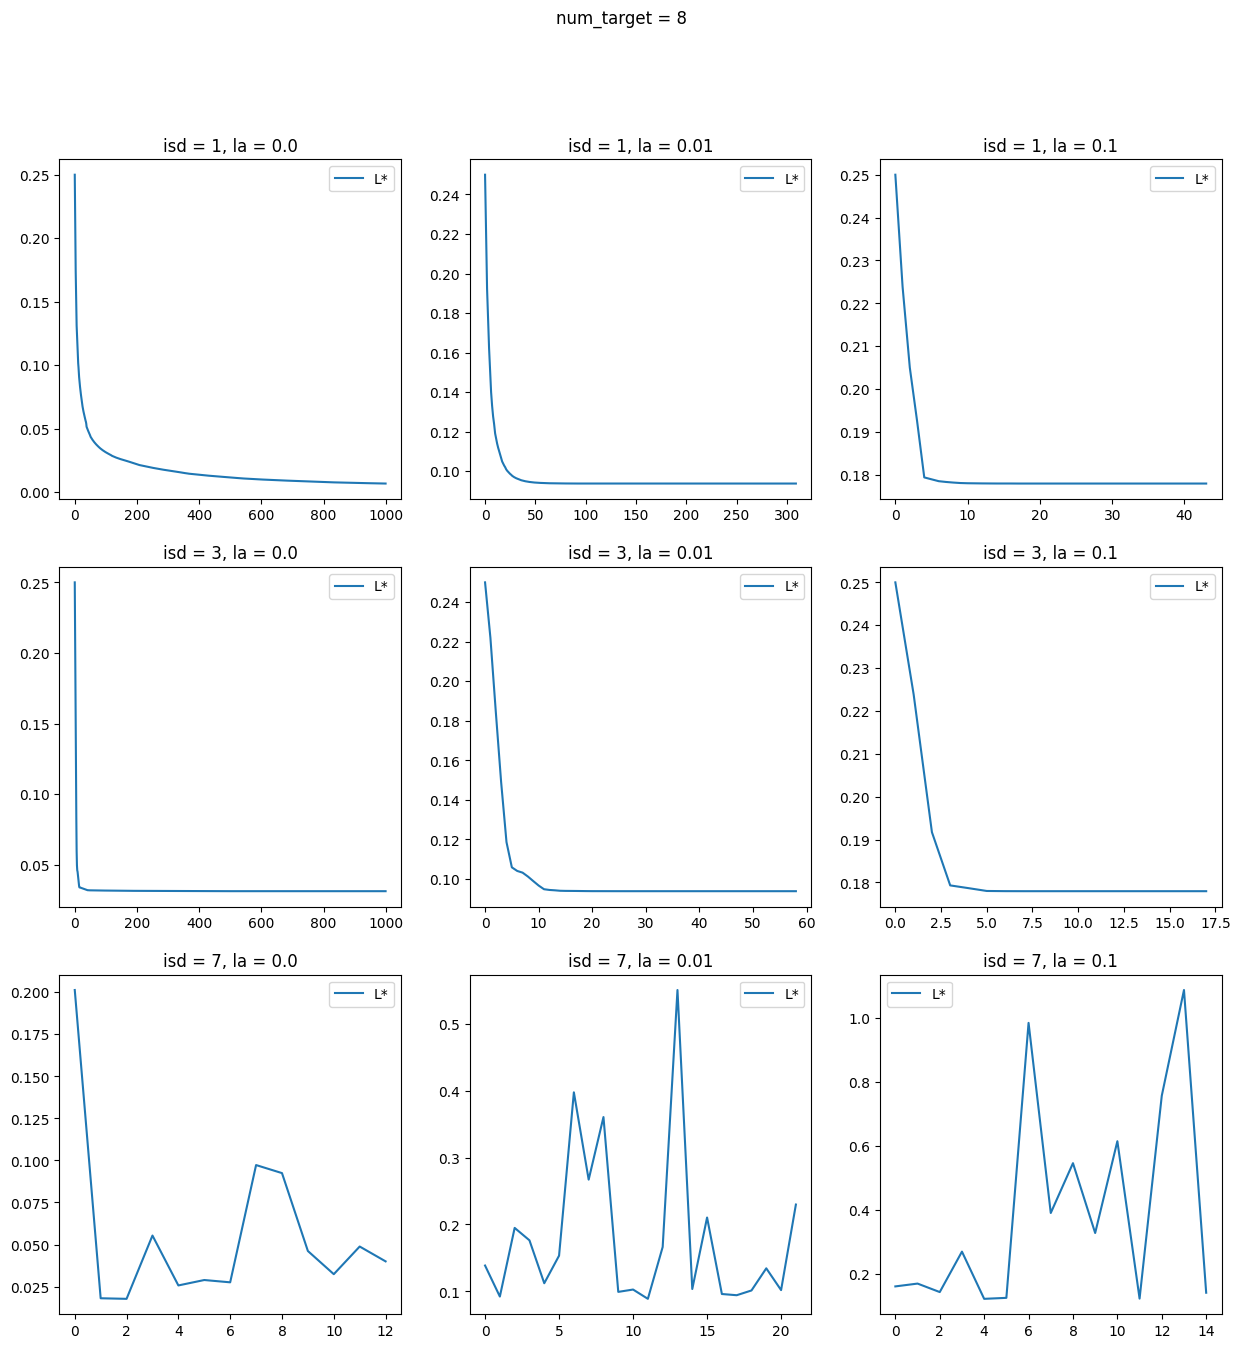

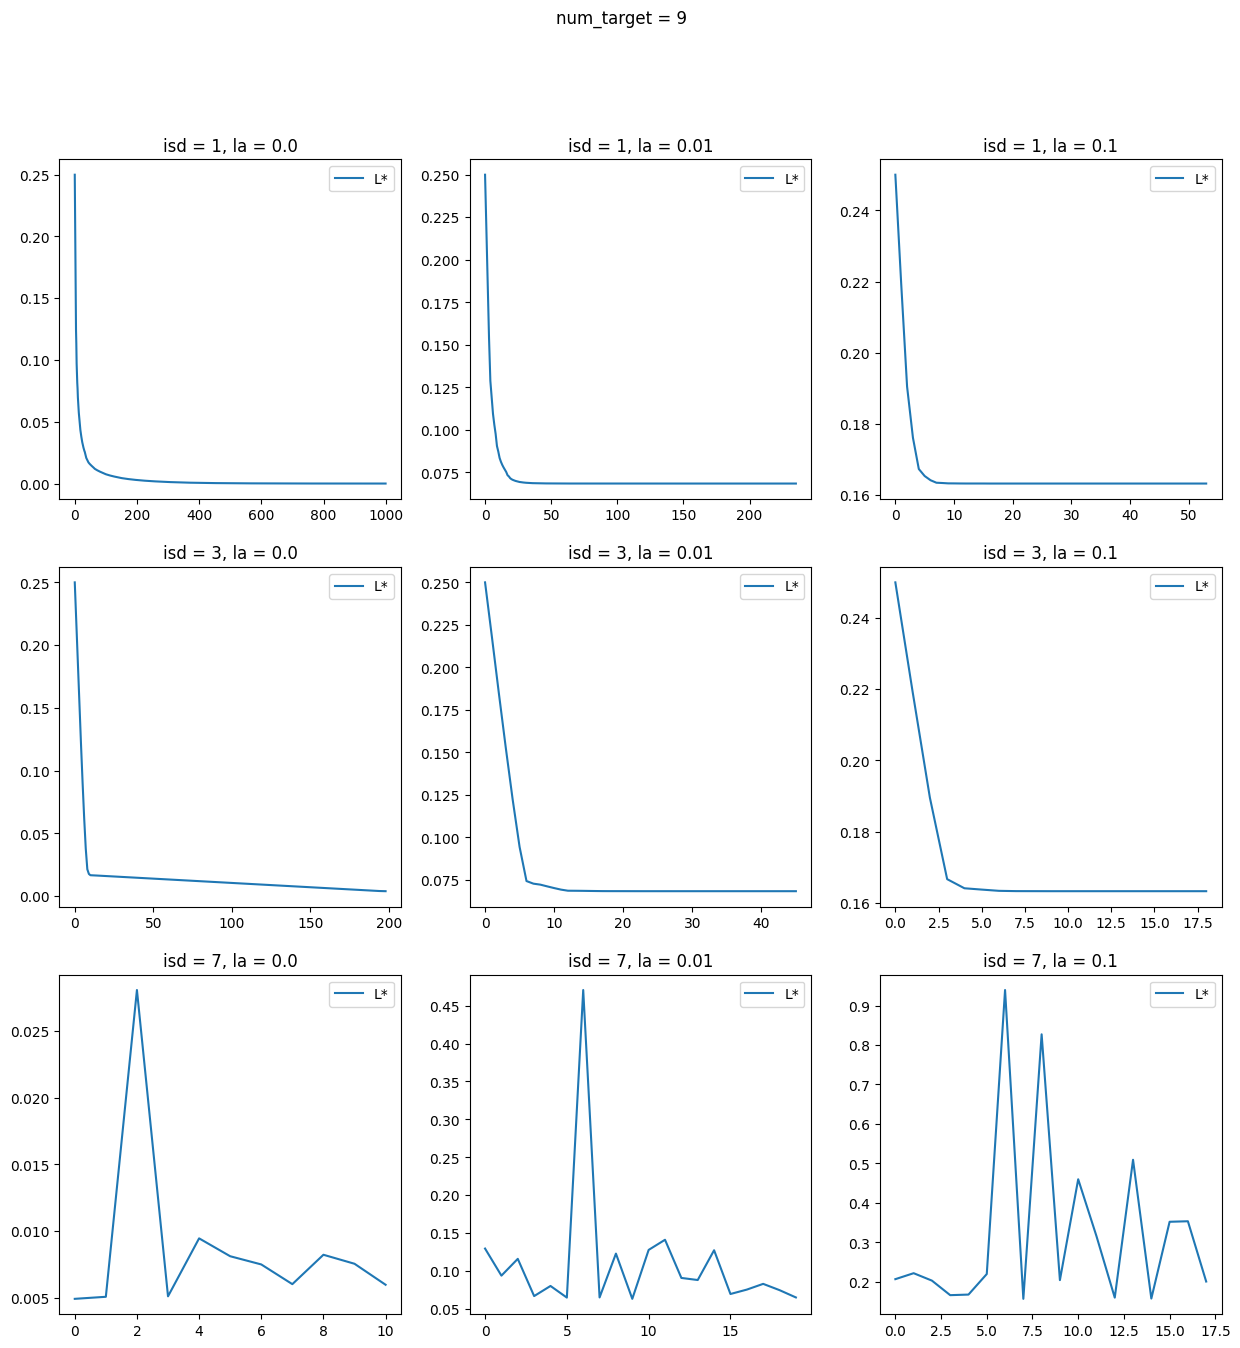

In [ ]:
for num_target in range(10): 
    # plot for every isd and la
    # show plots in a grid 3*3
    fig, axs = plt.subplots(len(dd['isd'].unique()), len(dd['la'].unique()), figsize=(15, 15))
    for i, isd in enumerate(dd['isd'].unique()):
        for j, la in enumerate(dd['la'].unique()):
            t = dd[(dd['isd'] == isd) & (dd['la'] == la) & (dd['num_target'] == num_target)]
            axs[i, j].plot(t['Lk'].values[0], label='L*')
            axs[i, j].set_title(f'isd = {isd}, la = {la}')
            axs[i, j].legend()
    
    plt.suptitle(f'num_target = {num_target}')
    plt.show()